In [1]:
#bank.csv dataset
#classification algorithm 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset bank.csv
df=pd.read_csv("bank.csv")
#to display first 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
'''Bank has launch marketing campaning which is based on telephone call and each row actually
representing an information about each telephone call.
Now we predict either customer will subscribe the deposit or not, basis of this information'''

#first, check null values in given dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
#datatype check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


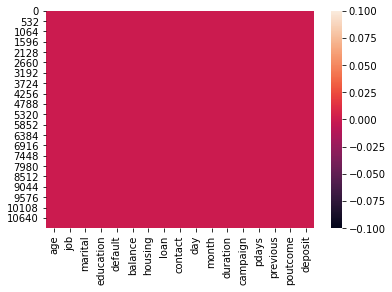

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
#select Input X and output Y  from given dataset df
X=df.drop("deposit",axis=1) #input features
Y=df["deposit"]#output features

In [9]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [11]:
#create user defined function
def create_model(model):   #create_model() user defined function and model user defined object
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
#BaseLine model :  we use classification algorithm :
- 1. LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression

In [16]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [17]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.76      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.77      3349

[[1402  358]
 [ 426 1163]]


LogisticRegression()

In [19]:
#here recall =0.73 means 73% it is good score  ,but we try , can much more better to this score
#region behind less score : - model is overfit 

#we use second classification algorithm decisiontreeclassifier : DT help select imp input features 
#top predict the output

#call decisiontreeclassifier class
from sklearn.tree import DecisionTreeClassifier  #DecisionTreeClassifier inbuilt class

In [20]:
#create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier() #by default Gini index method 

In [22]:
#call function  (train and test with decisiontree)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.79      0.78      3349

[[1420  340]
 [ 380 1209]]


In [23]:
#Lets check out what are the important input features that are selected by the decisiontree gini
#index : -
#we use inbuilt method feature_importances_ of DecisionTreeClassifier class(show reduction 
#and select highest reduction)
dt1.feature_importances_

array([0.08324777, 0.03385089, 0.01567101, 0.01245696, 0.00109811,
       0.07926081, 0.04341556, 0.00559474, 0.06251427, 0.08199148,
       0.09815156, 0.35064705, 0.02186507, 0.04824762, 0.02664029,
       0.0353468 ])

In [24]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

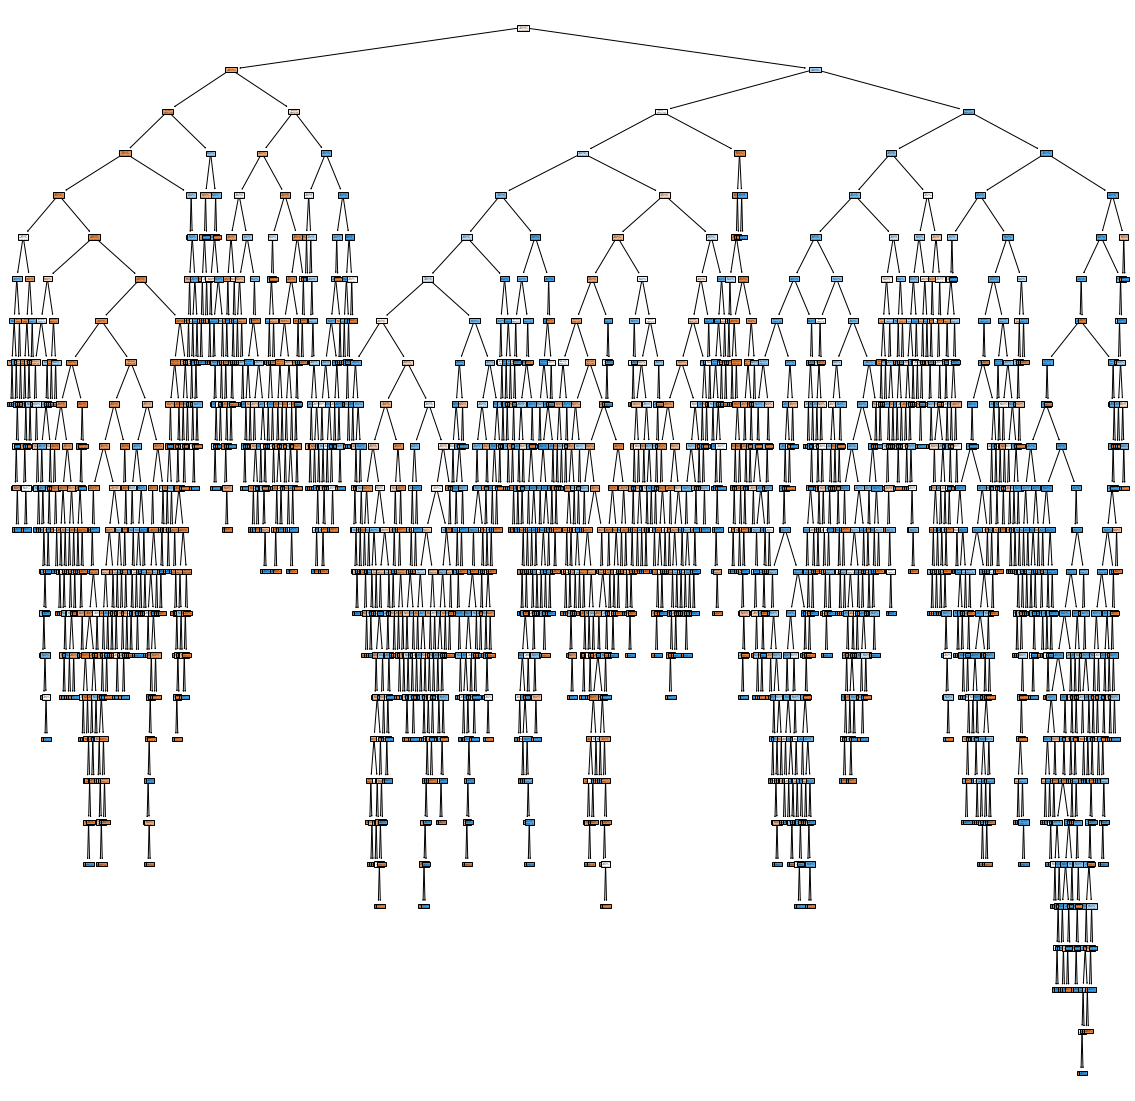

In [25]:
from sklearn import tree
#create a tree
#create the tree 
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [ ]:
#But we got less score 0.76 % its good but not excellent , 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter

In [39]:
#1. max_depth parameter 
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=6) #by default Gini index method 
#Note : max_depth can not more than 8

In [40]:
#call function (model train and test)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1760
           1       0.77      0.84      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1355  405]
 [ 261 1328]]


In [33]:
dt2.feature_importances_

array([0.04618794, 0.        , 0.        , 0.00261286, 0.        ,
       0.00771503, 0.07479213, 0.00344582, 0.10966343, 0.00937157,
       0.05108988, 0.54015422, 0.00239399, 0.07016887, 0.01566666,
       0.06673761])

In [29]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

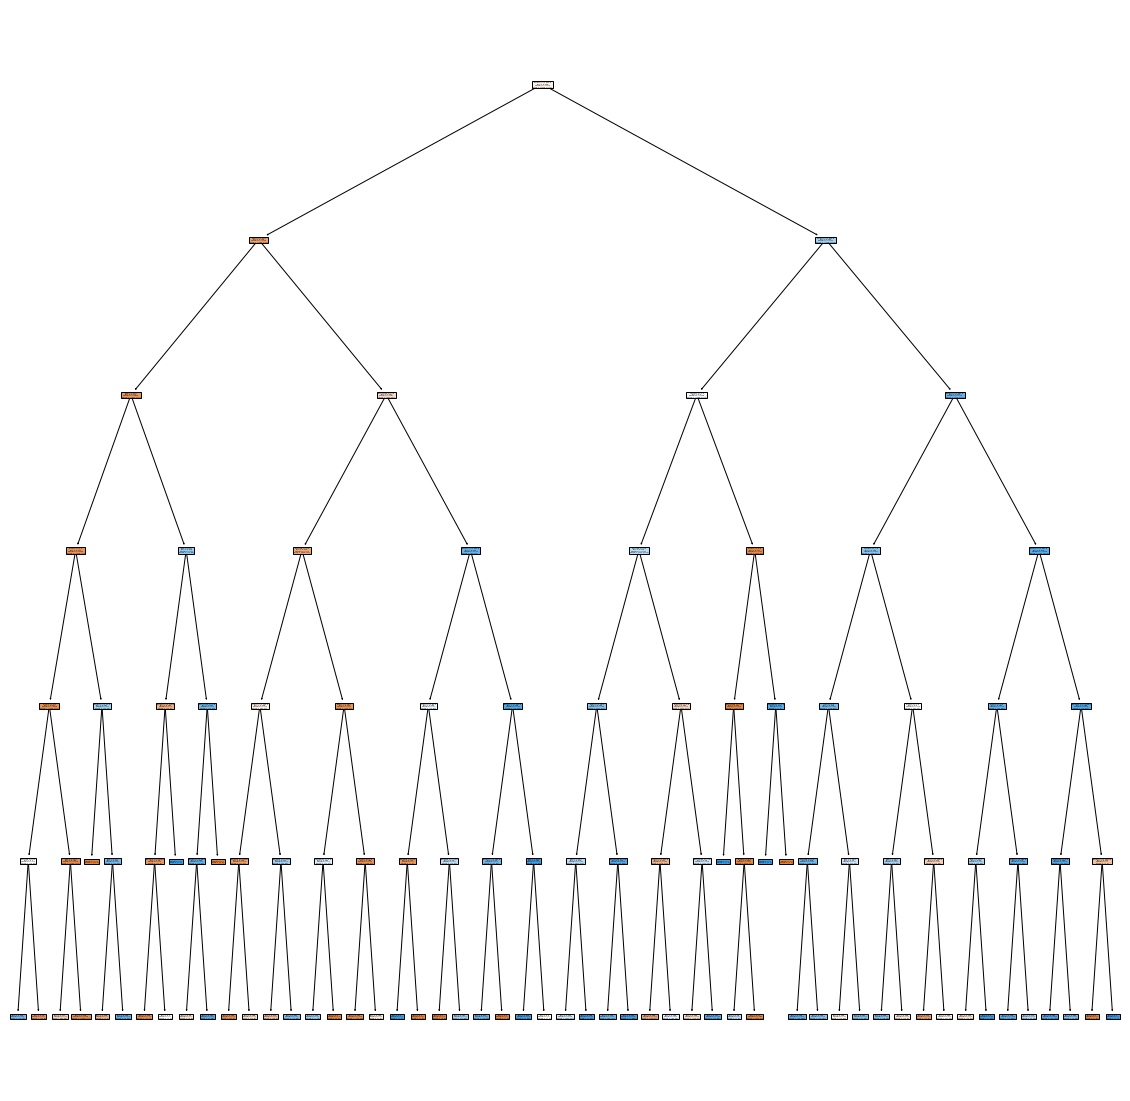

In [34]:
#create the tree 
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [55]:
#2nd purning technique : min_samples_leaf
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(min_samples_leaf=50) #by default Gini index method 
#min_samples_leaf =50 or more means not less than=50



In [56]:
#call function (model train and test)
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1378  382]
 [ 204 1385]]


In [48]:
dt3.feature_importances_

array([4.32585534e-02, 9.24370204e-04, 0.00000000e+00, 2.77361779e-03,
       0.00000000e+00, 1.69278277e-02, 5.95834312e-02, 3.23861306e-03,
       1.07929042e-01, 5.10750643e-03, 1.06044546e-01, 5.12702284e-01,
       4.77079697e-04, 5.71718800e-02, 2.28952287e-02, 6.09660193e-02])

In [59]:
np.round(dt3.feature_importances_,2)

array([0.04, 0.  , 0.  , 0.  , 0.  , 0.02, 0.07, 0.  , 0.11, 0.  , 0.11,
       0.5 , 0.  , 0.07, 0.  , 0.07])

In [45]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

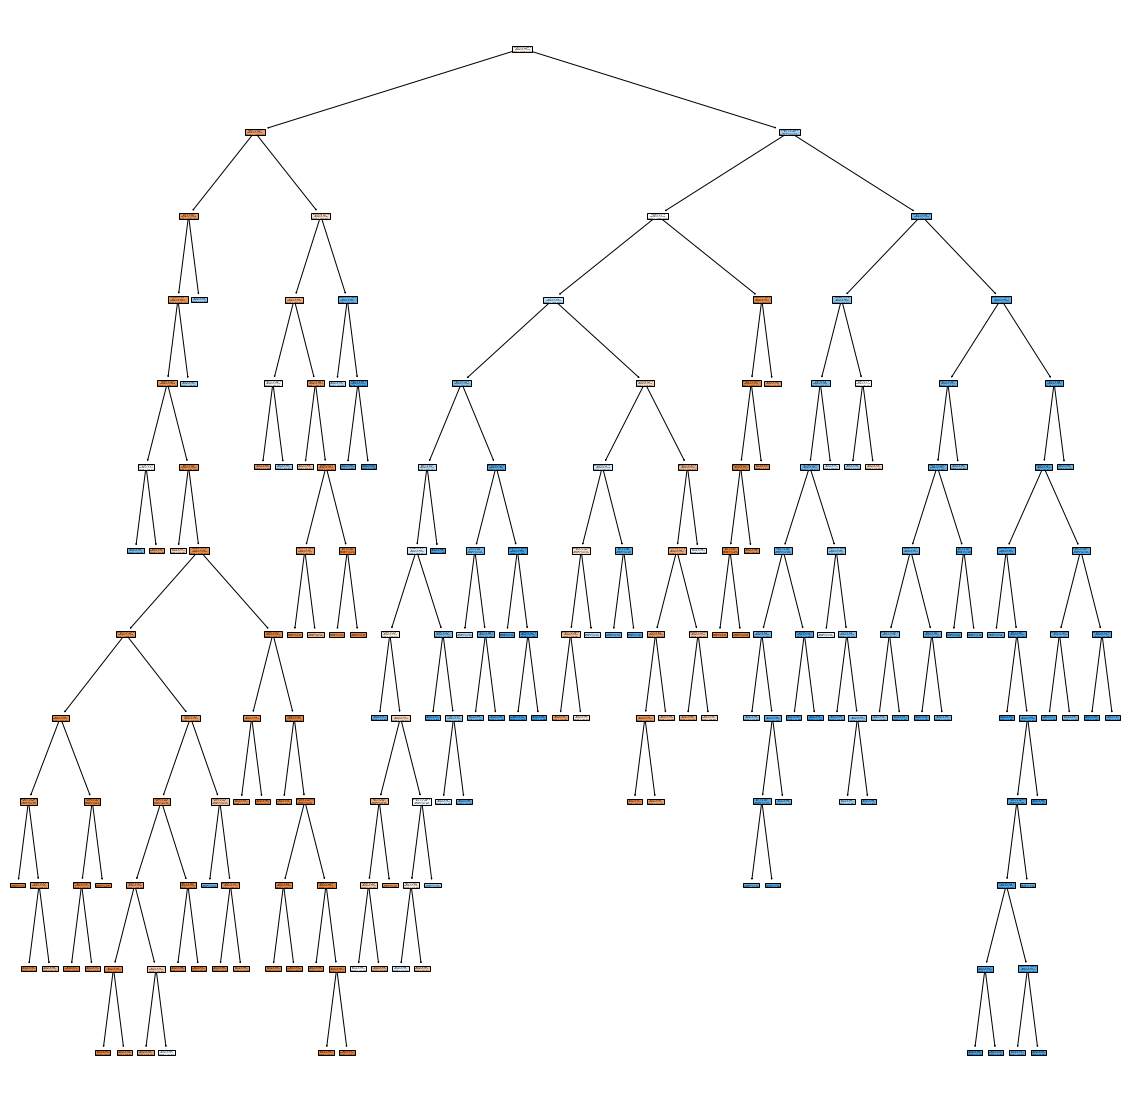

In [44]:
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [57]:
#use entropy method of decisiontree means -P(yes)*log2P(yes)-P(No)log2(P(no))

##create object of DecisionTreeClassifier class
dt4=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50) 

In [58]:
#call function (model train and test)
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1450  310]
 [ 285 1304]]


In [ ]:
#Note : here best method DecisionTree pruning tech : min_samples_leaf=50 and method=gini index
#recall .87 means 87% predict